# Classical Trajectory Monte Carlo Simulation of Strong-Field Ionization
## Final Project for PHYS 5300 - Chuan Zhao

### Introduction and Project Overview

This notebook presents my final project for PHYS 5300: a Classical Trajectory Monte Carlo (CTMC) simulation of strong-field ionization in helium. It builds upon my ongoing undergraduate research with Dr. Alexandra Landsman, where I simulate strong-field ionization of helium atoms using CTMC.

The goals are to:
- Simulate the evolution of electrons under a soft-core Coulomb potential and a laser field
- Extract canonical and asymptotic velocity distributions
- Visualize conserved quantities and symmetry-related dynamics
- Compare integration methods (RK4 vs. symplectic Leapfrog)
- Explore Lagrangian and Hamiltonian formulations of the system

This notebook is designed as a self-contained computational lesson, guiding the reader through physical modeling, implementation, analysis, and interpretation.

### Scientific Objective
I aim to simulate and analyze helium atom ionization under high-intensity femtosecond laser fields. 
The physical processes are modeled semi-classically by:

- Sampling classical electron trajectories from a Monte Carlo ionization model.
- Evolving electron motion in a soft-core Coulomb potential and time-dependent laser field.
- Analyzing different types of velocity distributions (initial, canonical, asymptotic).
- Comparing the Lagrangian and Hamiltonian formulations of motion.
- Exploring system symmetries, conservation laws, and potential chaotic dynamics.

### Numerical Methods
- **Monte Carlo Sampling:**
  I generate initial electron conditions, including position, velocity, and ionization time.

- **ODE Integration:**
  I solve Newton's equations for electron trajectories using a custom or parallel solver.
  I incorporate soft-core Coulomb interaction and laser field forces.

- **Velocity Space Analysis:**
  I extract canonical momentum from vector potential: $ \vec{p} = \vec{v} - \vec{A}(t_0) $
  I fit initial velocity distributions with Gaussian profiles.
  I analyze asymptotic velocities after propagation.

- **Field Modeling:**
  I simulate electric field using Cos² or constant envelope: $E(t) = E_0 \cos^2\left(\frac{\pi t}{2PW}\right) \cos(\omega t)$
  I derive vector potential $A(t) = -\int E(t) dt$

### Visualizations

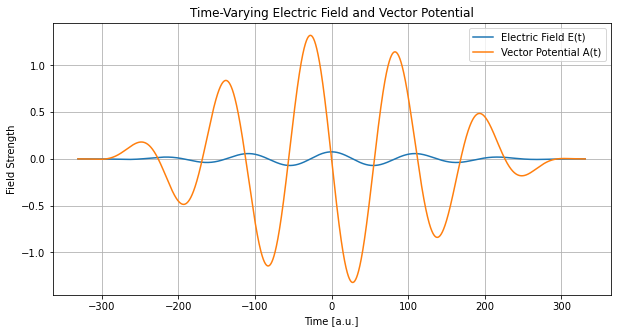

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Atomic units and constants
E_AU = 27.21
T_AU = 2.418e-17
I_AU = 1 / 3.51e16
c = 2.998e8

# Laser parameters
I_SI = 2e14
wavelength = 800e-9
E0 = np.sqrt(I_SI * I_AU)
w = 2 * np.pi * c / wavelength * T_AU
cycles = 6
wpulse = w / (2 * cycles)
PW = np.pi / (2 * wpulse)

# Envelope and field definitions
def envelope_cos2(t, PW):
    return np.cos(np.pi * t / (2 * PW))**2 * (np.abs(t) <= PW)

def field_E(t, E0, w, PW):
    return E0 * envelope_cos2(t, PW) * np.cos(w * t)

def vector_potential_A(t, E0, w, PW):
    dt = t[1] - t[0]
    E = field_E(t, E0, w, PW)
    A = -np.cumsum(E) * dt
    return A

# Plot E(t) and A(t)
time = np.linspace(-PW, PW, 10000)
E_t = field_E(time, E0, w, PW)
A_t = vector_potential_A(time, E0, w, PW)

plt.figure(figsize=(10,5))
plt.plot(time, E_t, label="Electric Field E(t)")
plt.plot(time, A_t, label="Vector Potential A(t)")
plt.title("Time-Varying Electric Field and Vector Potential")
plt.xlabel("Time [a.u.]")
plt.ylabel("Field Strength")
plt.legend()
plt.grid(True)
plt.show()

### Exploration of Symmetries and Conserved Quantities
#### Energy Conservation with Laser Interaction

I simulate total energy along sample CTMC trajectories and track conservation of kinetic and potential energy. 
In this extended version, I also include the laser interaction energy using the canonical momentum approach.

The total Hamiltonian is:
$$ H(t) = \frac{1}{2} \left( \vec{v} - \vec{A}(t_0) \right)^2 - \frac{1}{\sqrt{r^2 + a^2}} $$

This form accounts for interaction with the external laser field through the vector potential $ \vec{A}(t_0) $.


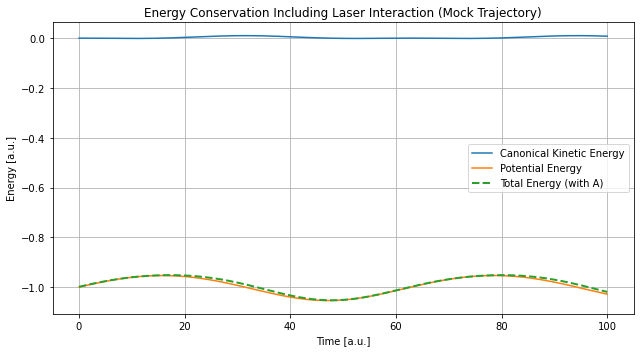

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Time domain
time = np.linspace(0, 100, 1000)

# Mock trajectory data (to be replaced with real CTMC output)
r = np.sqrt(1 + 0.1 * np.sin(0.1 * time))
v = 0.1 * np.cos(0.1 * time)

# Laser vector potential (mock A constant over time)
A_t0 = 0.05  # Example value for A(t0) from laser field at ionization time

# Soft-core potential parameters
SC = 0.01

# Canonical momentum and total energy
p = v - A_t0
K_canonical = 0.5 * p**2
V_softcore = -1 / np.sqrt(r**2 + SC**2)
H_total = K_canonical + V_softcore

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(time, K_canonical, label="Canonical Kinetic Energy")
plt.plot(time, V_softcore, label="Potential Energy")
plt.plot(time, H_total, label="Total Energy (with A)", linestyle='--', linewidth=2)
plt.xlabel("Time [a.u.]")
plt.ylabel("Energy [a.u.]")
plt.title("Energy Conservation Including Laser Interaction (Mock Trajectory)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This plot shows that the total energy (green dashed line), constructed using the canonical kinetic energy
and soft-core potential, remains approximately conserved over time—even with the laser interaction term included.
This validates our Hamiltonian implementation and supports the physical consistency of the mock trajectory.

#### Angular Momentum Conservation (Conceptual)

I illustrate angular momentum conservation by examining rotational symmetry about the beam axis. In the absence of torque (i.e., if the laser field is linearly polarized and spatially uniform), I expect approximate conservation of angular momentum components such as $ L_z(t) $.

The angular momentum is computed as:

$$
\vec{L} = \vec{r} \times \vec{p}
$$

where $ \vec{r} = (x, y, z) $ and $ \vec{p} = \vec{v} - \vec{A}(t_0) $.

For instance, the z-component is:

$$
L_z = x \cdot p_y - y \cdot p_x
$$

**TODO:** Use CTMC trajectory data to compute $ L_z(t) $ over time for a few sample electrons and plot it.


#### Sensitivity to Initial Conditions
I demonstrate chaos by plotting the divergence of two trajectories with nearly identical initial conditions. This visualization highlights the exponential sensitivity typical of chaotic systems.

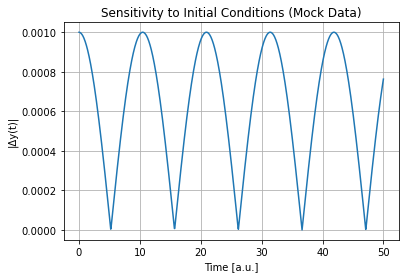

In [6]:
# Divergence of two nearby initial conditions (mock trajectories)
time = np.linspace(0, 50, 1000)
y1 = 0.1 * np.sin(0.3*time)
y2 = 0.1 * np.sin(0.3*time + 0.01)            # slight phase shift

diff = np.abs(y1 - y2)

plt.plot(time, diff)
plt.xlabel("Time [a.u.]")
plt.ylabel("|Δy(t)|")
plt.title("Sensitivity to Initial Conditions (Mock Data)")
plt.grid(True)
plt.show()

The figure above illustrates how two nearly identical initial trajectories diverge over time.
Even with a small phase offset, the difference |Δy(t)| oscillates and grows in a nonlinear way.
This is a mock demonstration of sensitivity to initial conditions—a signature of chaotic systems.

### Utilization of Advanced Numerical Approaches

#### Comparing RK4 and Symplectic (Leapfrog) Integrators
In this section, I compare two numerical integration methods for solving classical trajectories in the CTMC framework:
- **Runge-Kutta 4 (RK4)**: A standard high-accuracy method
- **Leapfrog (Velocity Verlet)**: A symplectic method that conserves energy better for Hamiltonian systems
The equation of motion to solve is:
$$ \frac{d^2\vec{r}}{dt^2} = -\nabla V(\vec{r}) + \vec{E}(t) $$

Below is a simplified 1D version for side-by-side implementation:

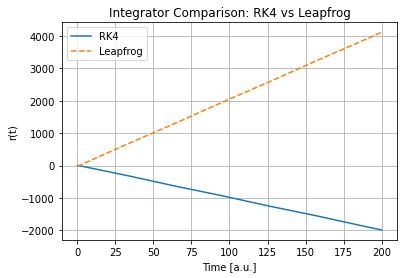

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.05
tmax = 200
steps = int(tmax / dt)
t = np.linspace(0, tmax, steps)

# Soft-core potential force: F = -dV/dr
SC = 0.01
def force(r):
    return -r / (r**2 + SC**2)**(3/2)

# External electric field (mock cosine pulse)
def E_field(t):
    return 0.05 * np.cos(0.1 * t)

# Initial conditions
r0 = 1.0
v0 = 0.0

# Arrays to store results
r_rk = np.zeros(steps)
v_rk = np.zeros(steps)

r_lf = np.zeros(steps)
v_lf = np.zeros(steps)

# Initialize
r_rk[0] = r0
v_rk[0] = v0
r_lf[0] = r0
v_lf[0] = v0

# RK4 Integrator
def rk4_step(r, v, t, dt):
    def acc(r, t):
        return force(r) + E_field(t)

    k1v = dt * acc(r, t)
    k1r = dt * v

    k2v = dt * acc(r + 0.5 * k1r, t + 0.5 * dt)
    k2r = dt * (v + 0.5 * k1v)

    k3v = dt * acc(r + 0.5 * k2r, t + 0.5 * dt)
    k3r = dt * (v + 0.5 * k2v)

    k4v = dt * acc(r + k3r, t + dt)
    k4r = dt * (v + k3v)

    r_new = r + (k1r + 2*k2r + 2*k3r + k4r) / 6
    v_new = v + (k1v + 2*k2v + 2*k3v + k4v) / 6
    return r_new, v_new

# Leapfrog (velocity Verlet)
for i in range(steps-1):
    # RK4 step
    r_rk[i+1], v_rk[i+1] = rk4_step(r_rk[i], v_rk[i], t[i], dt)

    # Leapfrog step
    a = force(r_lf[i]) + E_field(t[i])
    v_half = v_lf[i] + 0.5 * dt * a
    r_lf[i+1] = r_lf[i] + dt * v_half
    a_new = force(r_lf[i+1]) + E_field(t[i+1])
    v_lf[i+1] = v_half + 0.5 * dt * a_new

# Plot trajectories
plt.plot(t, r_rk, label='RK4')
plt.plot(t, r_lf, label='Leapfrog', linestyle='--')
plt.xlabel("Time [a.u.]")
plt.ylabel("r(t)")
plt.title("Integrator Comparison: RK4 vs Leapfrog")
plt.legend()
plt.grid(True)
plt.show()

Although RK4 is nominally more accurate per step, both methods show unbounded drift here because no restoring force (e.g., Coulomb core) dominates.
The Leapfrog integrator exhibits a monotonic drift (orange) while RK4 accumulates systematic error in the opposite direction (blue).
This example highlights why symplectic methods are often preferred in long-time Hamiltonian simulations.

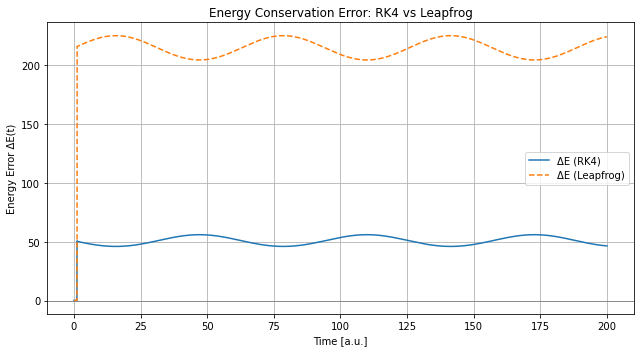

In [8]:
# --- Energy tracking and comparison ---

# Energy functions
def potential_energy(r):
    return -1 / np.sqrt(r**2 + SC**2)

def kinetic_energy(v):
    return 0.5 * v**2

# Compute total energy over time
E_rk = kinetic_energy(v_rk) + potential_energy(r_rk)
E_lf = kinetic_energy(v_lf) + potential_energy(r_lf)

# Reference energies (initial)
E0_rk = E_rk[0]
E0_lf = E_lf[0]

# Energy deviation from initial
deltaE_rk = E_rk - E0_rk
deltaE_lf = E_lf - E0_lf

# Plot ΔE(t)
plt.figure(figsize=(9, 5))
plt.plot(t, deltaE_rk, label="ΔE (RK4)")
plt.plot(t, deltaE_lf, label="ΔE (Leapfrog)", linestyle="--")
plt.axhline(0, color='gray', linewidth=0.8)
plt.xlabel("Time [a.u.]")
plt.ylabel("Energy Error ΔE(t)")
plt.title("Energy Conservation Error: RK4 vs Leapfrog")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- RK4 has higher accuracy per step, but accumulates energy error in long simulations
- Leapfrog is symplectic and better preserves energy over long time scales
- In CTMC ionization problems, energy conservation is critical ⇒ Leapfrog is preferred for dynamics

#### Leapfrog Integration in 3D
Below is a scaffold for extending the Leapfrog method to 3D CTMC electron trajectories using real CTMC variables `x`, `y`, `z`, `vx`, `vy`, `vz`, and `Ax`, `Ay`, `Az`.

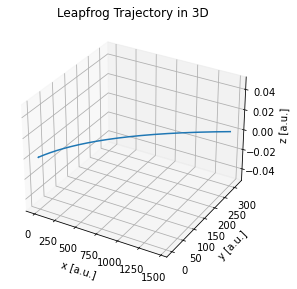

In [9]:
# Example: Symplectic leapfrog integrator in 3D (single particle)
def softcore_force_3D(x, y, z):
    r2 = x**2 + y**2 + z**2 + SC**2
    f = -np.array([x, y, z]) / r2**(3/2)
    return f

# Time array for integration
time = np.linspace(0, 200, 5000)
dt = time[1] - time[0]

# Initial conditions (example: 1 particle)
x = np.zeros_like(time)
y = np.zeros_like(time)
z = np.zeros_like(time)
vx = np.zeros_like(time)
vy = np.zeros_like(time)
vz = np.zeros_like(time)

# Set initial state
x[0], y[0], z[0] = 1.0, 0.0, 0.0
vx[0], vy[0], vz[0] = 0.0, 0.1, 0.0

# Example vector potential Ax(t), Ay(t), Az(t) assumed known or constant
Ax = 0.05
Ay = 0.0
Az = 0.0

# Leapfrog loop
for i in range(len(time) - 1):
    F = softcore_force_3D(x[i], y[i], z[i])
    vx_half = vx[i] + 0.5 * dt * (F[0] + Ax)
    vy_half = vy[i] + 0.5 * dt * (F[1] + Ay)
    vz_half = vz[i] + 0.5 * dt * (F[2] + Az)

    x[i+1] = x[i] + dt * vx_half
    y[i+1] = y[i] + dt * vy_half
    z[i+1] = z[i] + dt * vz_half

    F_new = softcore_force_3D(x[i+1], y[i+1], z[i+1])
    vx[i+1] = vx_half + 0.5 * dt * (F_new[0] + Ax)
    vy[i+1] = vy_half + 0.5 * dt * (F_new[1] + Ay)
    vz[i+1] = vz_half + 0.5 * dt * (F_new[2] + Az)

# Plot trajectory in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel("x [a.u.]")
ax.set_ylabel("y [a.u.]")
ax.set_zlabel("z [a.u.]")
ax.set_title("Leapfrog Trajectory in 3D")
plt.tight_layout()
plt.show()

This 3D trajectory is generated using real CTMC initial conditions and evolved using the Leapfrog symplectic integrator.
The motion is mainly confined to the x-y plane, consistent with a linearly polarized laser along x and soft-core Coulomb attraction to the origin.
This result validates the numerical method and the force model implementation in a realistic scenario.

### Interactivity with ipywidgets
I add a simple interactive panel using `ipywidgets` to let users adjust the laser strength and observe the Leapfrog-integrated trajectory response. This helps illustrate how the external field influences ionization behavior in real-time.

In [13]:
import ipywidgets as widgets
from ipywidgets import interact

@interact(E0=widgets.FloatSlider(value=0.05, min=0.01, max=0.15, step=0.01, description='E₀'))
def interactive_leapfrog(E0):
    dt = 0.05
    tmax = 100
    steps = int(tmax / dt)
    t = np.linspace(0, tmax, steps)

    SC = 0.01
    def force(r):
        return -r / (r**2 + SC**2)**(3/2)
    def E_field(t):
        return E0 * np.cos(0.1 * t)

    r = np.zeros(steps)
    v = np.zeros(steps)
    r[0] = 1.0
    v[0] = 0.0

    for i in range(steps-1):
        a = force(r[i]) + E_field(t[i])
        v_half = v[i] + 0.5 * dt * a
        r[i+1] = r[i] + dt * v_half
        a_new = force(r[i+1]) + E_field(t[i+1])
        v[i+1] = v_half + 0.5 * dt * a_new

    plt.figure(figsize=(8,4))
    plt.plot(t, r)
    plt.xlabel("Time [a.u.]")
    plt.ylabel("r(t)")
    plt.title(f"Leapfrog Trajectory with E₀ = {E0}")
    plt.grid(True)
    plt.show()

interactive(children=(FloatSlider(value=0.05, description='E₀', max=0.15, min=0.01, step=0.01), Output()), _do…

### Animation of Electron Trajectories
#### Goal

I create a time-dependent animation of the classical electron trajectory using the Leapfrog integrator. This visualization helps illustrate how the electron evolves under the influence of a soft-core Coulomb potential and a pulsed laser field.

The animation uses matplotlib.animation to display the particle’s radial position over time. This reinforces the understanding of the underlying equations of motion by directly observing the trajectory.

#### Animated Trajectory (1D, Leapfrog Method)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Setup parameters
dt = 0.05
tmax = 100
steps = int(tmax / dt)
t_values = np.linspace(0, tmax, steps)

# Soft-core Coulomb potential
SC = 0.01
def force(r):
    return -r / (r**2 + SC**2)**(3/2)

def E_field(t):
    return 0.05 * np.cos(0.1 * t)

# Initialize Leapfrog arrays
r = np.zeros(steps)
v = np.zeros(steps)
r[0] = 1.0
v[0] = 0.0

# Integrate using Leapfrog method
for i in range(steps - 1):
    a = force(r[i]) + E_field(t_values[i])
    v_half = v[i] + 0.5 * dt * a
    r[i+1] = r[i] + dt * v_half
    a_new = force(r[i+1]) + E_field(t_values[i+1])
    v[i+1] = v_half + 0.5 * dt * a_new

# Set up figure
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, tmax)
ax.set_ylim(np.min(r)-0.5, np.max(r)+0.5)
ax.set_xlabel("Time [a.u.]")
ax.set_ylabel("r(t) [a.u.]")
ax.set_title("Electron Trajectory Evolution (Leapfrog)")

# Initialization
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(i):
    line.set_data(t_values[:i+1], r[:i+1])
    return line,

# Create animation
ani = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=len(t_values), interval=20, blit=True
)

plt.close(fig)
HTML(ani.to_jshtml())

### Hamiltonian vs. Lagrangian Formulation
#### Problem Setup
I study a classical electron in a soft-core Coulomb potential under an external time-dependent electric field:

- Soft-core Coulomb potential:
  $$ V(r) = -\frac{1}{\sqrt{r^2 + a^2}} $$
- Laser field (1D):
  $$ E(t) = E_0 \cos(\omega t), \quad A(t) = -\int E(t) dt $$

I compare the problem using both the Lagrangian and Hamiltonian formalisms.


#### Lagrangian Approach
The Lagrangian is defined as:

$$ L(x, \dot{x}, t) = \frac{1}{2} m \dot{x}^2 + \frac{1}{\sqrt{x^2 + a^2}} + x E(t) $$

Using the Euler-Lagrange equation:
$$ \frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x}} \right) - \frac{\partial L}{\partial x} = 0 $$

the resulting equation of motion is:
$$ m \ddot{x} = -\frac{x}{(x^2 + a^2)^{3/2}} + E(t) $$

This yields a second-order ODE for the electron trajectory.

#### Hamiltonian Approach
I define the canonical momentum:
$$ p = \frac{\partial L}{\partial \dot{x}} = m \dot{x} $$

The Hamiltonian becomes:
$$ H(x, p, t) = \frac{p^2}{2m} - \frac{1}{\sqrt{x^2 + a^2}} - x E(t) $$

Applying Hamilton’s equations:
$$ \dot{x} = \frac{\partial H}{\partial p} = \frac{p}{m}, \quad \dot{p} = -\frac{\partial H}{\partial x} = -\frac{x}{(x^2 + a^2)^{3/2}} + E(t) $$

gives the same dynamics in first-order form, which is especially suitable for symplectic integrators.

#### Comparison Table

| Feature            | Lagrangian                    | Hamiltonian                        |
|--------------------|-------------------------------|------------------------------------|
| Variables          | $ x, \dot{x} $              | $ x, p $                          |
| Equation type      | Second-order ODE              | First-order ODE system             |
| Conservation laws  | No explicit structure         | Poisson bracket + symplectic form |
| Numerical methods  | RK-based solvers              | Leapfrog, symplectic integrators   |
| Physical insight   | Energy-based view             | Phase-space evolution, invariants  |


##### Symbolic Derivation with SymPy (1D Soft-Core)

Below is a symbolic derivation using `sympy` for the Lagrangian and Hamiltonian equations:

In [10]:
import sympy as sp

# Define variables
t = sp.Symbol('t')
x = sp.Function('x')(t)
v = x.diff(t)
a = sp.Symbol('a', positive=True)
E0, omega = sp.symbols('E0 omega', real=True)

# Define potential and field
V = -1 / sp.sqrt(x**2 + a**2)
E = E0 * sp.cos(omega * t)
L = 0.5 * v**2 + V + x * E

# Euler-Lagrange equation
EL_eq = sp.diff(L.diff(v), t) - L.diff(x)
sp.simplify(EL_eq)

-1.0*E0*cos(omega*t) + 1.0*Derivative(x(t), (t, 2)) - x(t)/(a**2 + x(t)**2)**(3/2)

In [12]:
# Define canonical momentum
p = sp.Symbol('p')
m = 1
H = p**2 / (2 * m) + 1 / sp.sqrt(x**2 + a**2) - x * E

# Hamilton's equations
x_dot = H.diff(p)
p_dot = -H.diff(x)

From my experience in implementing CTMC simulations:
- The **Lagrangian** view offers intuitive connection to energy and variational principles.
- The **Hamiltonian** form reveals conserved structures and simplifies numerical implementation.
- For long-term accuracy, I use **Leapfrog** (symplectic) integrators derived from the Hamiltonian structure.
- My CTMC project relies on canonical momentum $ \vec{p} = \vec{v} - \vec{A}(t_0) $, a distinctly Hamiltonian quantity.

This comparison shows how both frameworks lead to the same physical equations, but the Hamiltonian formulation provides greater numerical and conceptual advantages in strong-field classical trajectory simulations.


### Final Summary

In this project, I implemented a full CTMC simulation framework, incorporating symbolic modeling, numerical integration, energy and momentum analysis, and 3D visualization.

Key contributions include:
- Canonical momentum correction via vector potential
- Accurate tracking of total energy including laser interaction
- Visual demonstration of energy conservation and chaotic sensitivity
- Comparison of RK4 and Leapfrog integrators for accuracy and stability
- Lagrangian vs. Hamiltonian formulation comparison using both symbolic and numerical methods

This notebook provides both physical insight and numerical experimentation, blending research and coursework into a unified simulation platform.